# The Map Widget

One of the coolest, most convenient things about the ArcGIS API for Python is the map widget. The map widget provides users an instant visual interface for their data by taking advantage of Jupyter's widget capabilities and rendering an interactive map viewer inline in your notebook. To make a map in a notebook, it's literally as easy as calling `gis.map()`- from there, you can add whatever layers you desire, and use the tool to see your data, publish maps, and aid in the process of cleaning data & analyzing features. We're going to be showing you a brief demo on how you can work the map widget into your data-oriented workflows.

It's important to note that even though this Map Viewer object is generated via a method in the `GIS` class, it creates an instance of the `MapView` class- for those of you reading this notebook after-the-fact, we'll link the documentation for both of these below.

`gis.map()` (scroll down to the function): https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#gis#map

`MapView`: https://developers.arcgis.com/python/api-reference/arcgis.widgets.html#arcgis.widgets.MapView

First, we're just going to show how to call the widget in it's most basic state, and search your GIS for layers to add.

In [1]:
import arcgis
from arcgis.gis import GIS
# Create a GIS object
gis = GIS(profile = "your_online_profile")

Upon creation, we can set the focus of the map to a specific location. To the South we go!

In [2]:
# Create a map widget
map1 = gis.map('Louisiana') # Passing a place name to the constructor
                               # will initialize the extent of the map.
map1

MapView(layout=Layout(height='400px', width='100%'))

### Adding layers to the map
Adding a layer is super easy- just retrieve a layer object, and pass it in the `add_layer()` method. We'll find layers to add by searching our `GIS`. We'll take a look at some oil rigs in the Gulf of Mexico.

In [3]:
flayer_search_result = gis.content.search("Points; owner:esri","Feature Layer", outside_org=True, max_items=40)
flayer_search_result

[<Item title:"USA Traffic Counts" type:Feature Layer Collection owner:esri>,
 <Item title:"USA Drilling Platforms (Mature Support)" type:Feature Layer Collection owner:esri>,
 <Item title:"World Exclusive Economic Zone Boundaries" type:Feature Layer Collection owner:esri>,
 <Item title:"Request Tracking" type:Feature Layer Collection owner:esri>,
 <Item title:"USA Submerged Lands Act Boundary (Mature Support)" type:Feature Layer Collection owner:esri>]

<Item title:"USA Drilling Platforms (Mature Support)" type:Feature Layer Collection owner:esri>
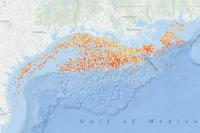

In [4]:
flayer_search_result[1]

In [5]:
map1.add_layer(flayer_search_result[1])

#### Adding layer objects to the map
You can add a number of different layer objects, such as `FeatureLayer`, `FeatureCollection`, `ImageryLayer`, `MapImageLayer`, to the map. We're going to pile on another `FeatureLayer` for the sake of a little visual contrast.

In [6]:
us_states_item = gis.content.get('e26f2752e86d4a8dad52ea75501480f0')
us_states_layer = us_states_item.layers[0]
us_states_layer

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_States_analysis_trim/FeatureServer/0">

In [7]:
map1.add_layer(us_states_layer)

In [8]:
map1

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

If you're adding a bunch of layers to your map, it's easy to keep track of them and view your new map's contents- just call `map.layers`.

In [ ]:
map1.layers

### Custom Symbology & Methods

We'd be remiss if we didn't touch upon the underlying structure of a map. As some of you might know, JavaScript does a lot of the heavy lifting for these maps, so the data is all stored in JSON dictionaries. In order to edit a map in the Python API, we have to change and add to these dictionaries.

There are a couple ways our API approaches this- we have methods that take advantage of JSAPI methods, and we also have methods that manually construct these dictionaries and add them into the map so they get rendered. If you're really comfortable with the structure, you can put together these dictionaries yourself and add them to the map data. We'll briefly preview all of these methods, but you can read more up on them below.
  
https://developers.arcgis.com/python/guide/advanced-cartography-part1/

In [9]:
map2 = gis.map("Louisiana")
map2

MapView(layout=Layout(height='400px', width='100%'))

First, we're going to take advantage of the JavaScript API by passing our method the name of a renderer that the JSAPI can produce for us. More info on these types of renderers can be found here: https://developers.arcgis.com/javascript/latest/api-reference/esri-renderers-Renderer.html

In [10]:
# Assign a new renderer to the layer when adding
map2.add_layer(flayer_search_result[1], {"renderer":"ClassedColorRenderer", "field_name": "waterdepth"})

Now we can instantly get an idea of the water depth at each one of these oil rigs. The auto-generated renderer defined a number of bins to sort our data into.

Next, we'll show how we can access the data of a specific layer and edit it manually. First, we'll take a look at the data of our layer and figure out what we need to change.

In [11]:
us_states_layer.properties

{
  "currentVersion": 11,
  "id": 0,
  "name": "dtl_st_trim",
  "type": "Feature Layer",
  "serviceItemId": "e26f2752e86d4a8dad52ea75501480f0",
  "cacheMaxAge": 3600,
  "displayField": "",
  "description": "",
  "copyrightText": "",
  "defaultVisibility": true,
  "editingInfo": {
    "lastEditDate": 1630436151812,
    "schemaLastEditDate": 1630436151812,
    "dataLastEditDate": 1630436151812
  },
  "multiScaleGeometryInfo": {
    "levels": [
      1,
      3,
      5,
      7,
      9,
      11,
      13,
      15
    ],
    "generalizationType": "DP"
  },
  "relationships": [],
  "isDataVersioned": false,
  "hasContingentValuesDefinition": false,
  "supportsAppend": true,
  "supportsCalculate": true,
  "supportsASyncCalculate": true,
  "supportsTruncate": true,
  "supportsAttachmentsByUploadId": true,
  "supportsAttachmentsResizing": true,
  "supportsRollbackOnFailureParameter": true,
  "supportsStatistics": true,
  "supportsExceedsLimitStatistics": true,
  "supportsAdvancedQueries": 

As you can see, the properties are all in JSON form. What we need to do is edit the renderer's symbol info, which is found under drawingInfo. Luckily, the Python API object for layers allows you to access the renderer property directly by calling `.renderer`. We'll change the color of the states below. Let's pick a color online and use the proper RGB + Alpha value to change it.

In [12]:
us_states_layer.renderer

{'type': 'simple', 'symbol': {'color': [255, 235, 175, 118], 'outline': {'color': [0, 0, 0, 255], 'width': 0.75, 'type': 'esriSLS', 'style': 'esriSLSSolid'}, 'type': 'esriSFS', 'style': 'esriSFSSolid'}}

In [13]:
# Change the renderer dictionary of the layer before adding
renderer = us_states_layer.renderer
renderer["symbol"]["color"] = [111, 3, 252, 118]
us_states_layer.renderer = renderer
map2.add_layer(us_states_layer)

In [14]:
map2

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

## Saving the map as a web map

Now that we've shown how to put together these maps, we'll show you how you can save them as a web map in your `GIS`. This process persists all the basemaps, layers added with or without your custom symbology (including smart mapping), pop-ups, extent, and graphics drawn (with or without custom symbols) as layers in your web map.

To save the map, call the `save()` method. This method creates and returns a new Web Map Item object. As parameters, you can specify all valid `Item` properties as shown below:

In [15]:
webmap_properties = {'title':'USA WebMap',
                    'snippet': 'Jupyter notebook widget saved as a web map',
                    'tags':['automation', 'python']}

webmap_item = map2.save(webmap_properties)
webmap_item

<Item title:"USA WebMap" type:Web Map owner:nparavicini_geosaurus>

As you can see, now it can exist in your portal for generations upon generations. Map the Future!

## Properties of the map widget

Finally, we're going to look at few of the handy things you can adjust while you're using this widget.

The map widget has several properties that you can query and set, such as its zoom level, basemap, height, extent, mode, heading, rotation, tilt, scale, and so on. We'll start by listing out all of the properties of a map, then show some of them in action.

In [ ]:
map2.

#### Zoom Level


In [16]:
# Create a map widget
map3 = gis.map('Redlands, CA') # Passing a place name to the constructor
                               # will initialize the extent of the map.
map3

MapView(layout=Layout(height='400px', width='100%'))

In [17]:
map3.zoom

11.0

Assigning a value to the zoom property will update the widget, which is equivalent to manually clicking the "zoom in" button twice.

In [18]:
map3.zoom = 5

In [ ]:
map3

You can also set the rotation property for the 2D mode. This can similarly be achieved by right-clicking and dragging on the map. Let's get real whacky with it and flip the world on its head.

In [19]:
map3.rotation = 180


#### Map Center

The center property reveals the coordinates of the center of the map.

In [20]:
map4 = gis.map("Santa Fe") # creating a map object with default parameters
map4

MapView(layout=Layout(height='400px', width='100%'))

In [21]:
map4.center

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'x': -11792990.9323356,
 'y': 4258299.619291896}

If you know the latitude and longitude of your place of interest, you can assign it to the center property. For instance, we can now set the center to be within California.

In [22]:
map4.center = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
               'x': -13044706.248636946,
               'y': 4036244.856763349}

#### Basemap

Basemaps are layers on your map over which all other operational layers that you add are displayed. Basemaps typically span the full extent of the world and provide context to your `GIS` layers. It helps viewers understand where each feature is located as they pan and zoom to various extents.

When you create a new map or scene, you can choose which basemap you want from the basemap gallery in the Map Viewer. 

When your `gis` connection is created anonymously, the `basemaps` and `gallery_basemaps` properties of the created `MapView` object displays the default themes. While signing onto your own organization, the two properties would display your own customized options if set.

Your map can have a number of different basemaps. To see what basemaps are included with the widget, query the `basemaps` property:

In [23]:
map4.basemap # the current basemap being used

'default'

In [24]:
map4.basemaps # the basemap galleries

['dark-gray-vector',
 'gray-vector',
 'hybrid',
 'oceans',
 'osm',
 'satellite',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo-vector',
 'arcgis-imagery',
 'arcgis-imagery-standard',
 'arcgis-imagery-labels',
 'arcgis-light-gray',
 'arcgis-dark-gray',
 'arcgis-navigation',
 'arcgis-navigation-night',
 'arcgis-streets',
 'arcgis-streets-night',
 'arcgis-streets-relief',
 'arcgis-topographic',
 'arcgis-oceans',
 'osm-standard',
 'osm-standard-relief',
 'osm-streets',
 'osm-streets-relief',
 'osm-light-gray',
 'osm-dark-gray',
 'arcgis-terrain',
 'arcgis-community',
 'arcgis-charted-territory',
 'arcgis-colored-pencil',
 'arcgis-nova',
 'arcgis-modern-antique',
 'arcgis-midcentury',
 'arcgis-newspaper',
 'arcgis-hillshade-light',
 'arcgis-hillshade-dark',
 'arcgis-human-geography',
 'arcgis-human-geography-dark']

You can assign any one of the supported basemaps to the `basemap` property to change the basemap. For instance, you can change the basemap to the `satellite` basemap as below:

In [25]:
map4.basemap = 'arcgis-midcentury'

In [26]:
map4

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

In [27]:
map4.basemap

'arcgis-midcentury'

And there you have it! The quick and dirty of the map widget. We'll dive further into actually manipulating the data in the upcoming demos, but we wanted to start by showing how you could easily get temporary and permanent visual representation of your features, as that can often be helpful in a workflow.